### IMPORT LIBRARIES ###

In [234]:
from scipy.interpolate import interp1d,make_interp_spline, BSpline
from IPython.display import clear_output
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### CONVERT CSV TO PANDAS DATAFRAME ###

In [235]:
df = pd.read_csv('vgsales.csv')

In [236]:
#Raw dataset 
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### DATA ANALYSIS  PART ###
***

#### Quick Notes ####
- Valid years
- Genres
- Publishers

In [237]:
int(df["Year"].min()),int(df["Year"].max())

(1980, 2020)

The data is valid between years 1980-2020

In [238]:
(df["Genre"].drop_duplicates().reset_index(drop = True))

0           Sports
1         Platform
2           Racing
3     Role-Playing
4           Puzzle
5             Misc
6          Shooter
7       Simulation
8           Action
9         Fighting
10       Adventure
11        Strategy
Name: Genre, dtype: object

The data contains 12 game genres

In [239]:
df["Publisher"].drop_duplicates().reset_index(drop=True)

0                         Nintendo
1           Microsoft Game Studios
2             Take-Two Interactive
3      Sony Computer Entertainment
4                       Activision
                  ...             
574                   Inti Creates
575                         Takuyo
576             Interchannel-Holon
577                     Rain Games
578              UIG Entertainment
Name: Publisher, Length: 579, dtype: object

There are 579 different publishers in the dataset

### Total Regional Sales and Distribution ###
Now take general look on the distribution of game sales by regions

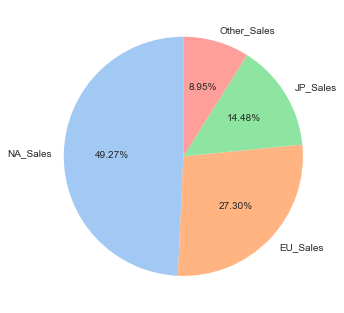

In [240]:
continental_sales = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
plt.pie(continental_sales.sum(), colors = sns.color_palette('pastel')[0:4], 
        labels = continental_sales.columns,startangle=90,autopct='%1.2f%%')

#For displaying only the graphs, not code outputs
clear_output(wait=True)

### Regional Sales of Each Publishers ###
This is how many publisher exists in our data.

In [241]:
publishers_and_sales = pd.DataFrame(data = {"Publishers":df["Publisher"].drop_duplicates().reset_index(drop=True),
                                          "EU_Sales":np.zeros(579),"NA_Sales":np.zeros(579),"JP_Sales":np.zeros(579),
                                          "Other_Sales":np.zeros(579),
                                          "Total_Sales":np.zeros(579)})
def sumSales(arr):
    return np.sum(arr)

for index, rows in publishers_and_sales.iterrows():

    if rows["Publishers"] in df["Publisher"].values:
        publishers_and_sales.iloc[index,[1,2,3,4,5]] = df[df.Publisher == rows.Publishers][["EU_Sales","NA_Sales","JP_Sales","Other_Sales","Global_Sales"]].apply(sumSales,result_type = "expand")  

#### Most Sold 20 Companies ####

In [242]:
Top_Publishers = publishers_and_sales.sort_values(["Total_Sales"],ascending = False).head(20).reset_index(drop=True)
Top_Publishers

,Publishers,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Total_Sales
0,Nintendo,418.74,816.87,455.42,95.33,1786.56
1,Electronic Arts,371.27,595.07,14.04,129.77,1110.32
2,Activision,215.53,429.70,6.54,75.34,727.46
3,Sony Computer Entertainment,187.72,265.22,74.10,80.45,607.50
4,Ubisoft,163.32,253.43,7.50,50.26,474.72
5,Take-Two Interactive,118.14,220.49,5.83,55.24,399.54
6,THQ,94.73,208.77,5.01,32.14,340.77
7,Konami Digital Entertainment,69.69,92.16,91.30,30.31,283.64
8,Sega,82.00,109.40,57.03,24.52,272.99
9,Namco Bandai Games,42.63,69.52,127.07,14.69,254.09


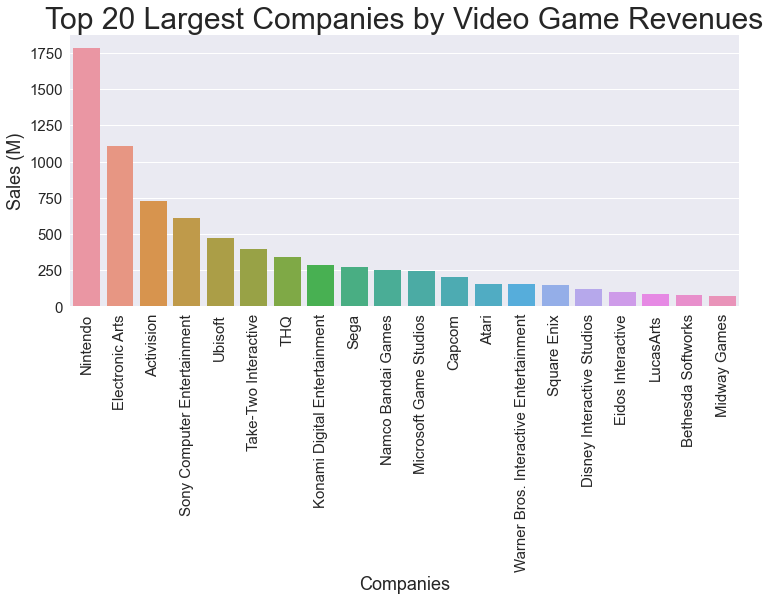

In [243]:
plt.figure(figsize = (12,5))

sns.barplot(x = Top_Publishers["Publishers"], 
        y = Top_Publishers["Total_Sales"])

plt.title("Top 20 Largest Companies by Video Game Revenues",fontsize = 30)

plt.xlabel("Companies",fontsize = 18)
plt.ylabel("Sales (M)",fontsize = 18)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.xticks(rotation = 90)

plt.style.use("seaborn-dark")

As shown in the figure, Nintendo has made roughly $1.75 billion profits from game sales over the last 40 years.

#### Progress of Nintendo year by year ####

In [244]:
(df[df.Publisher == "Nintendo"].sort_values("Year", ascending = True).min()[["Year","Name"]],
df[df.Publisher == "Nintendo"].sort_values("Year", ascending = True).max()[["Year","Name"]])

(Year               1983.0
 Name    100 Classic Books
 dtype: object,
 Year                      2016.0
 Name    Zero: Tsukihami no Kamen
 dtype: object)

- The history of the Nintendo company as far as we know dates back to 1983. Also, 100 Classic Books is the first is the first product which has been published.

- Zero: Tsukihami no Kamen is the latest game published in 2016.

In [245]:
Nintendo_Sales = df[df.Publisher == "Nintendo"].sort_values("Year", ascending = True)

Nintendo_Sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1839,1841,Donkey Kong Jr.,NES,1983.0,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11
763,765,Mahjong,NES,1983.0,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
700,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
1861,1863,Popeye,NES,1983.0,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10
...,...,...,...,...,...,...,...,...,...,...,...
5508,5510,Custom Robo,N64,NaN,Role-Playing,Nintendo,0.00,0.00,0.29,0.04,0.33
11409,11411,Zero: Tsukihami no Kamen,Wii,NaN,Action,Nintendo,0.00,0.00,0.08,0.00,0.08
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02


##### Progress in Different Regions #####

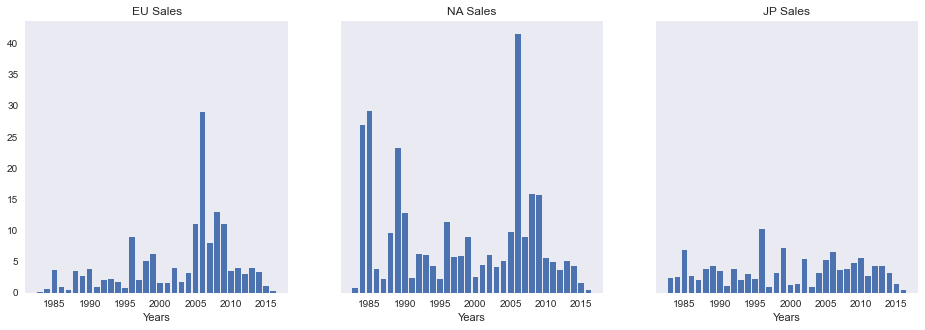

In [246]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 ,figsize = (16,5), sharey= True)

ax1.set_xlabel("Years")
ax1.set_title("EU Sales")

ax2.set_xlabel("Years")
ax2.set_title("NA Sales")

ax3.set_xlabel("Years")   
ax3.set_title("JP Sales")

ax1.bar(Nintendo_Sales["Year"],Nintendo_Sales["EU_Sales"])
ax2.bar(Nintendo_Sales["Year"],Nintendo_Sales["NA_Sales"])
ax3.bar(Nintendo_Sales["Year"],Nintendo_Sales["JP_Sales"])

plt.style.use("seaborn")


**It can be said that the games developed by Nintendo until 1995 are more important in the Japanese market and the US market.**

**Assumption: Since Nintendo is a Japanese and US multinational company, it may not be possible to open up to the European market at first.**

**Global Sales compared to top 20 publishers**

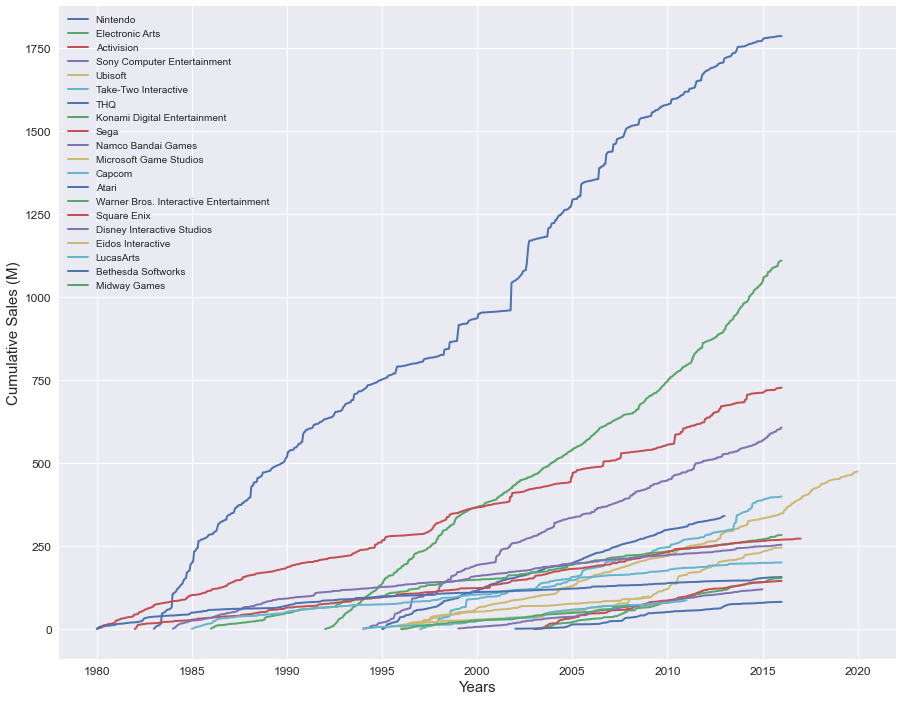

In [247]:
plt.figure(figsize = (15,12))
Publisher_CumulativeSales = pd.DataFrame()
Publisher_CumulativeSales["Publisher"] = Top_Publishers["Publishers"]
for index, rows in Top_Publishers.iterrows():
    
    newRow = df[df.Publisher == rows["Publishers"]].sort_values("Year", ascending = True)
    
    cumulativeSales = newRow["Global_Sales"].cumsum(skipna=True)
    
    xnew = np.linspace(newRow["Year"].min(),newRow["Year"].max(), len(cumulativeSales.index))  
    
    spl = make_interp_spline(xnew,cumulativeSales,k=9)  # type: BSpline
    
    power_smooth = spl(xnew)

    plt.plot(xnew,power_smooth, label = rows["Publishers"],linewidth=2)
   

plt.legend()   
    
plt.xlabel("Years",fontsize = 15)
plt.ylabel("Cumulative Sales (M)",fontsize = 15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

    
    

Progress of Global Sales of Top 20 Publisher year by year.

Assumptions: 
- By looking at the increase rate, it is likely that Sony Computer Entertainment may have passed Activision between 2015-2020
- The two companies with the fastest growth over the years are Nintendo and Electronics arts
- The company that showed the least increase (almost zero) is Atari company. The decrease in popularity of Atari games with new technological developments may be a reason for this. Lets check if Atari has made a noticable profit after 2600's.


In [248]:
(df[(df.Publisher == "Atari") & (df.Platform == "2600")].sort_values(by = "Year")["Global_Sales"].mean(),
df[(df.Publisher == "Atari") & (df.Platform != "2600")].sort_values(by = "Year")["Global_Sales"].mean())

(0.9275925925925926, 0.34669902912621336)

There is a noticeable difference between the averages of revenues from the 2600  **( \$ 0.927M)** platform, where Atari first came out, and the revenues from other platforms **(0.346M)** . It can be said that it is really related to technological developments.

### GENRES ###

It is time to analyse top sold genres and popular regional markets.

In [249]:
genres_and_sales = pd.DataFrame(columns = ['Genre', 'EU_Sales','NA_Sales','JP_Sales','Other_Sales','Global_Sales'])
genres_and_sales['Genre'] = df.Genre.drop_duplicates().reset_index(drop = True)

def sumSales(arr):
    return np.sum(arr)

for index, rows in genres_and_sales.iterrows():
    genres_and_sales.iloc[index]["EU_Sales","NA_Sales","JP_Sales","Other_Sales","Global_Sales"] = df[df.Genre == rows.Genre][["EU_Sales","NA_Sales","JP_Sales","Other_Sales","Global_Sales"]].apply(sumSales, result_type='expand') 



In [250]:
genres_and_sales

,Genre,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,376.85,683.35,135.37,134.97,1330.93
1,Platform,201.63,447.05,130.77,51.59,831.37
2,Racing,238.39,359.42,56.69,77.27,732.04
3,Role-Playing,188.06,327.28,352.31,59.61,927.37
4,Puzzle,50.78,123.78,57.31,12.55,244.95
5,Misc,215.98,410.24,107.76,75.32,809.96
6,Shooter,313.27,582.6,38.28,102.69,1037.37
7,Simulation,113.38,183.31,63.7,31.52,392.2
8,Action,525.0,877.83,159.95,187.38,1751.18
9,Fighting,101.32,223.59,87.35,36.68,448.91


There are 12 different genres in the data.

In [253]:
Top_Genres_Global = genres_and_sales.sort_values(by = "Global_Sales",ascending = False).reset_index(drop = True)
Top_Genres_Global

,Genre,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,525.0,877.83,159.95,187.38,1751.18
1,Sports,376.85,683.35,135.37,134.97,1330.93
2,Shooter,313.27,582.6,38.28,102.69,1037.37
3,Role-Playing,188.06,327.28,352.31,59.61,927.37
4,Platform,201.63,447.05,130.77,51.59,831.37
5,Misc,215.98,410.24,107.76,75.32,809.96
6,Racing,238.39,359.42,56.69,77.27,732.04
7,Fighting,101.32,223.59,87.35,36.68,448.91
8,Simulation,113.38,183.31,63.7,31.52,392.2
9,Puzzle,50.78,123.78,57.31,12.55,244.95


Action games rank first both in the NA market and in the global markets.

Time to check if popularity differs in other regions:

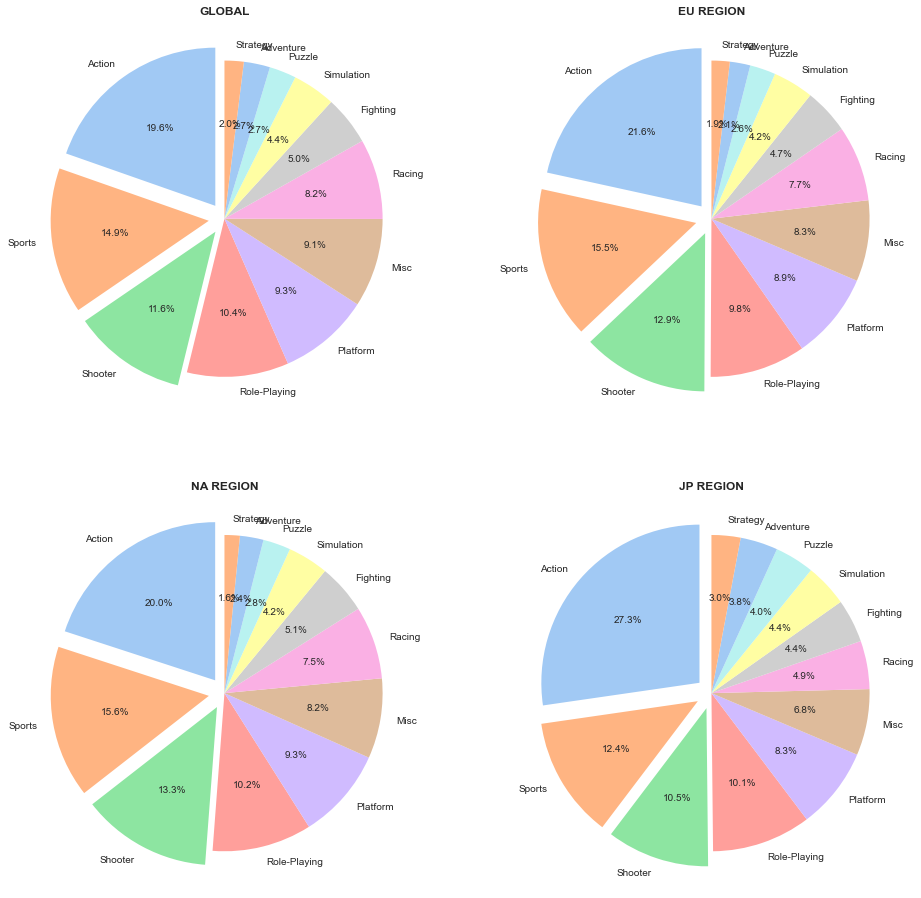

In [252]:
fig, ([ax1, ax2],[ax3,ax4]) = plt.subplots(2, 2 ,figsize = (16,16))


ax1.set_title("GLOBAL",fontweight='bold')
ax2.set_title("EU REGION",fontweight='bold')
ax3.set_title("NA REGION",fontweight='bold')
ax4.set_title("JP REGION",fontweight='bold')

explode = (0.1,0.1,0.1,0,0,0,0,0,0,0,0,0)

ax1.pie(Top_Genres_Global["Global_Sales"].sort_values(ascending = False),
        colors = sns.color_palette('pastel')[0:len(Top_Genres_Global)], 
        labels = Top_Genres_Global.Genre,startangle=90,autopct='%1.1f%%',explode = explode)

ax2.pie(Top_Genres_Global["EU_Sales"].sort_values(ascending = False),
        colors = sns.color_palette('pastel')[0:len(Top_Genres_Global)],
        labels = Top_Genres_Global.Genre,startangle=90,autopct='%1.1f%%',explode = explode)

ax3.pie(Top_Genres_Global["NA_Sales"].sort_values(ascending = False),
        colors = sns.color_palette('pastel')[0:len(Top_Genres_Global)],
        labels = Top_Genres_Global.Genre,startangle=90,autopct='%1.1f%%',explode = explode)

ax4.pie(Top_Genres_Global["JP_Sales"].sort_values(ascending = False),
        colors = sns.color_palette('pastel')[0:len(Top_Genres_Global)],
        labels = Top_Genres_Global.Genre,startangle=90,autopct='%1.1f%%',explode = explode)


clear_output()

Action, Sports and Shooter games are in top 3 in all regions while Strategy, Adventure and Puzzle games are in lowest 3.

So, it doesn't differ.

## Prediction Models

-----

...